In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Load Data

In [2]:
df = pd.read_csv("tes_full - Copy.csv").iloc[:,1:].drop_duplicates()

In [3]:
df.shape

(594, 13)

In [4]:
df.head()

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,links_response,website,fraud_score
0,CV.ASIATRIPINDONESIA,0.000000,1.0,1.0,1.0,0.0,1.0,1.0,100.0,100.0,{'https://asiatrip.id/reseller/': '<Response [...,http://asiatrip.id/,0.000000
1,Pt.BloomingLotusYoga,70.000000,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,{'http://www.blooming-lotus-yoga.com/bliss-mag...,https://www.blooming-lotus-yoga.com,0.000000
2,YayasanGreenSejahtera,11.111111,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,"{'': 'No Response/Timeout', 'https://greenseja...",https://greensejahterafoundation.com/,0.000000
3,PTMatairTerraSolusi,12.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"{'': 'No Response/Timeout', 'https://www.matai...",http://www.matair.co.id,0.666667
4,SimplyMii,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,100.0,0.0,{'https://www.simplymii.com/products/category/...,https://www.simplymii.com/,0.000000


In [5]:
label_df = pd.read_csv("merchants_cleaned.csv")[['merchant_name', 'website', 'label']]

In [6]:
join_df = df.merge(label_df, on=['merchant_name','website'])

In [7]:
join_df.groupby("label").size()

label
APPROVED    487
REJECTED    106
dtype: int64

### Check Distribution

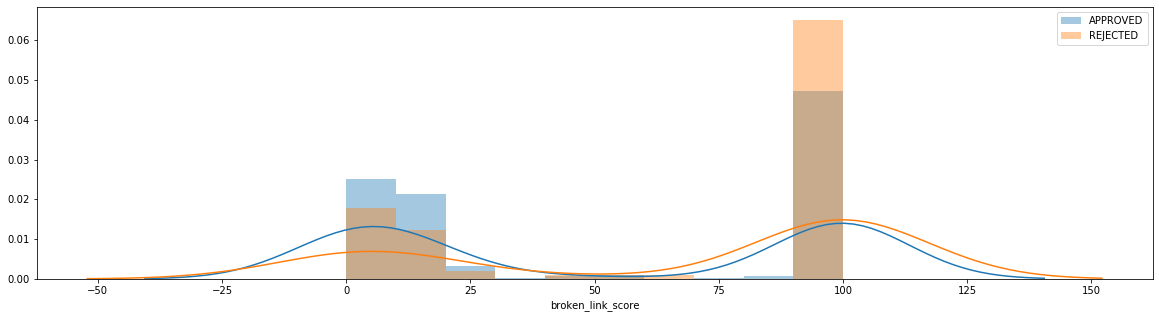

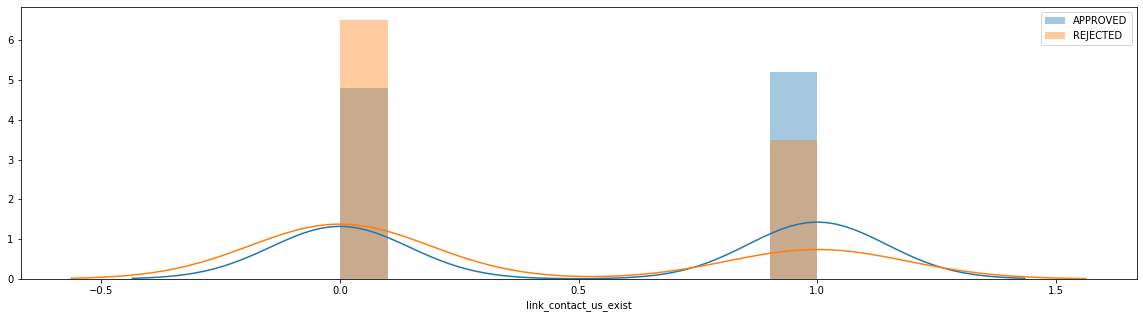

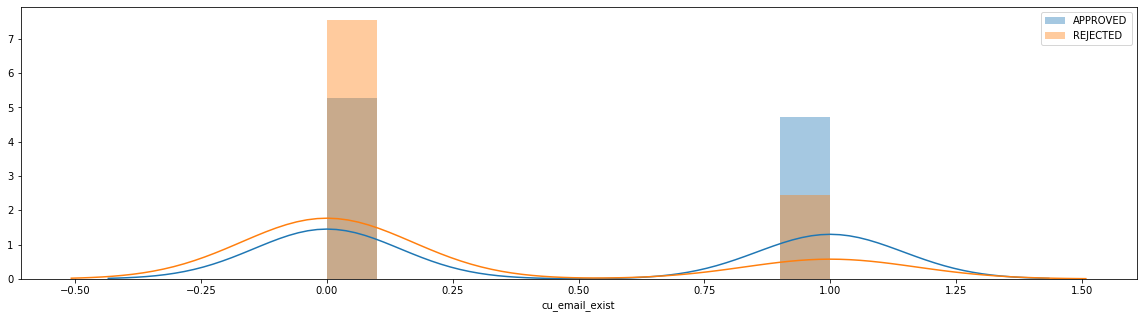

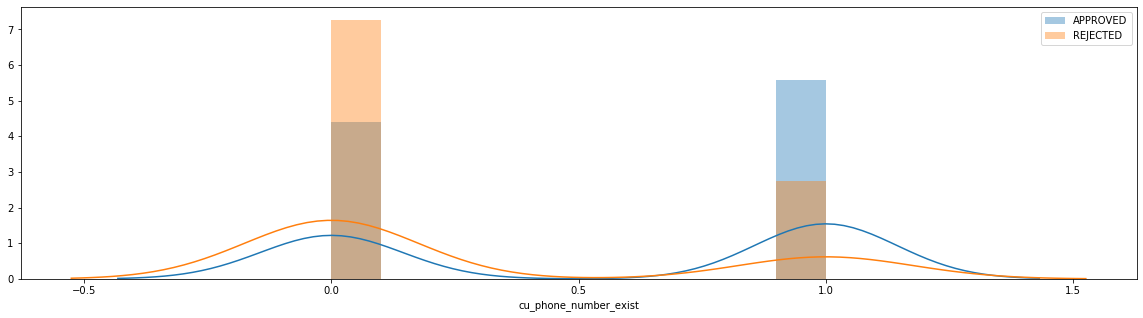

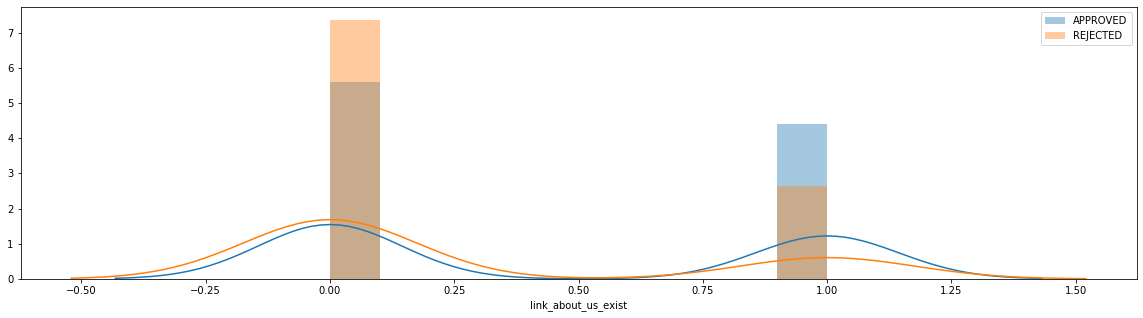

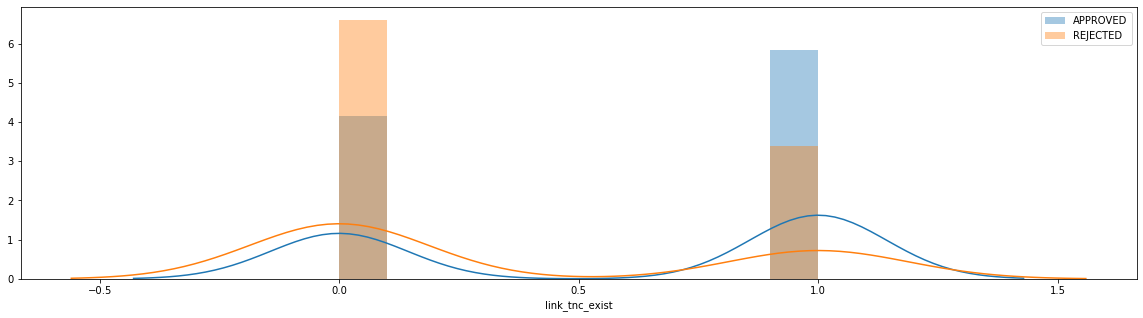

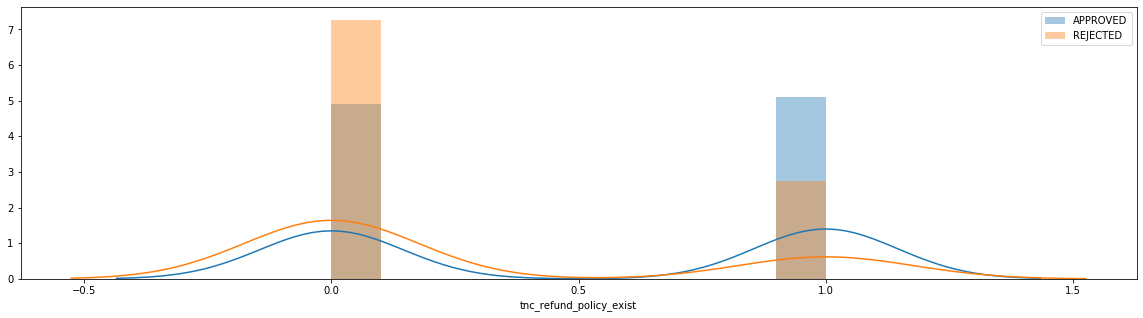

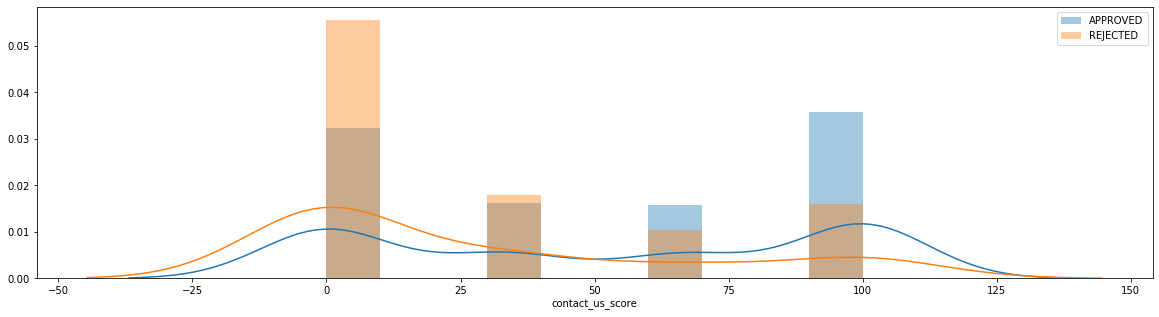

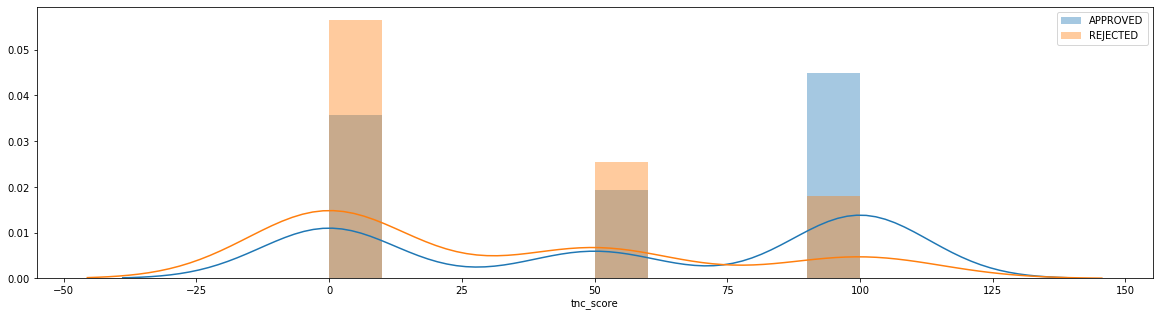

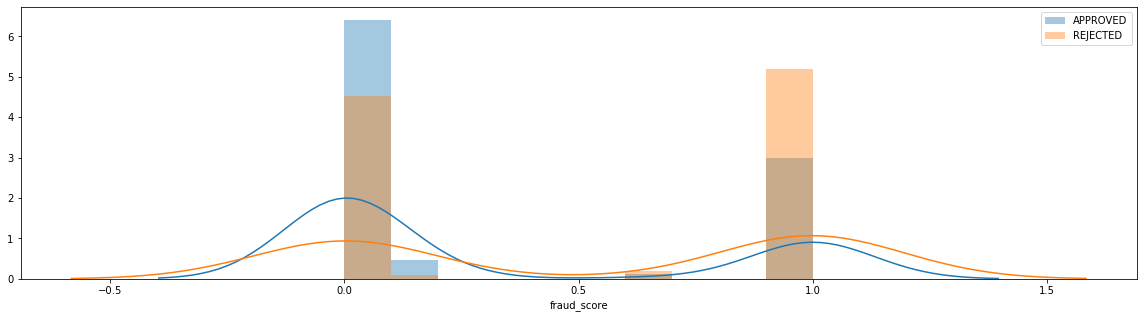

In [8]:
for column in join_df:
    if not (column == 'merchant_name' or column == 'label' \
            or column == 'website' or column == 'links_response'):
        plt.figure(figsize=(20,5))
        sns.distplot(join_df[join_df.label == 'APPROVED'][column], bins=10, label = 'APPROVED')
        sns.distplot(join_df[join_df.label == 'REJECTED'][column], bins=10, label = 'REJECTED')
        plt.legend()
        plt.show()

### Clean Data

In [9]:
join_df[\
        (join_df.label == 'APPROVED') & (join_df.broken_link_score == 100) & \
        (join_df.contact_us_score == 0) & (join_df.tnc_score == 0) | \
        (join_df.label == 'REJECTED') & (join_df.broken_link_score < 100) & \
        (join_df.contact_us_score >= 50) & (join_df.tnc_score >= 50)]

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,links_response,website,fraud_score,label
32,HuaningIndonesiaSukses,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,No hyperlinks gathered,https://www.jomooz.com,1.0,APPROVED
43,Bigfiveshop.com,0.0,1.0,1.0,1.0,0.0,1.0,1.0,100.000000,100.0,{'https://bigfiveshop.com/collections/silicone...,http://bigfiveshop.com,0.0,REJECTED
46,LUBRICANTS,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,No hyperlinks gathered,http://payment.server-development.net,1.0,APPROVED
59,BaboBaboTrading,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,No hyperlinks gathered,https://www.worldshopdeluxe.com,1.0,APPROVED
63,MissKaty,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,No hyperlinks gathered,misskatyid.com,1.0,APPROVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,PT. Professional Machinery,0.0,1.0,0.0,1.0,1.0,1.0,0.0,66.666667,50.0,{'https://duniadiving.com/dry-bag-40l-db-40l-b...,http://duniadiving.com,0.0,REJECTED
586,Toko Palugada,10.0,1.0,1.0,1.0,1.0,1.0,1.0,100.000000,100.0,{'https://www.doku.com/merchant-list': '<Respo...,http://www.doku.com,0.0,REJECTED
589,DOKU,10.0,1.0,1.0,1.0,1.0,1.0,1.0,100.000000,100.0,{'https://www.doku.com/index.php': '<Response ...,http://www.doku.com,0.0,REJECTED
591,CV P-Store.Net,0.0,1.0,1.0,0.0,1.0,1.0,1.0,66.666667,100.0,{'https://p-store.net/user/gusmanu': '<Respons...,https://p-store.net,0.0,REJECTED


In [10]:
to_be_removed = join_df[\
                        (join_df.label == 'APPROVED') & (join_df.broken_link_score == 100) & \
                        (join_df.contact_us_score == 0) & (join_df.tnc_score == 0) | \
                        (join_df.label == 'REJECTED') & (join_df.broken_link_score < 100) & \
                        (join_df.contact_us_score >= 50) & (join_df.tnc_score >= 50)]

In [11]:
join_df_cleaned = join_df[~join_df.index.isin(to_be_removed.index)]

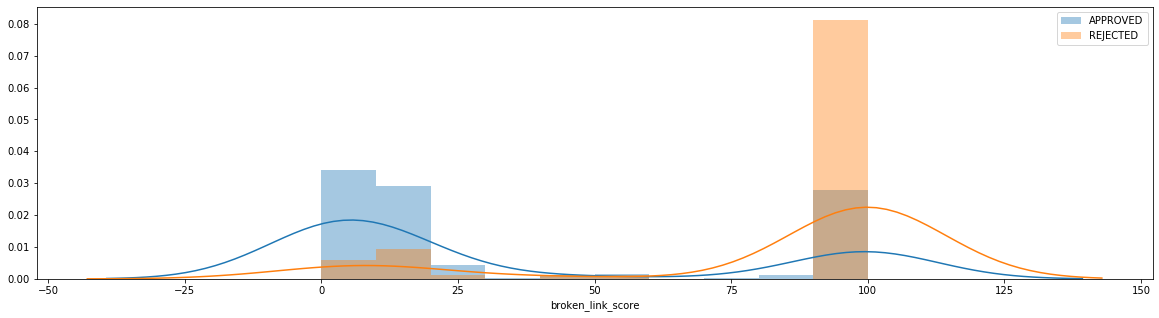

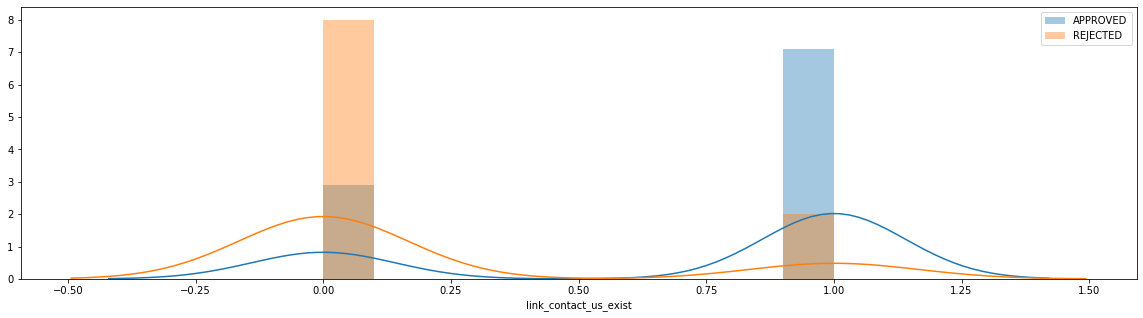

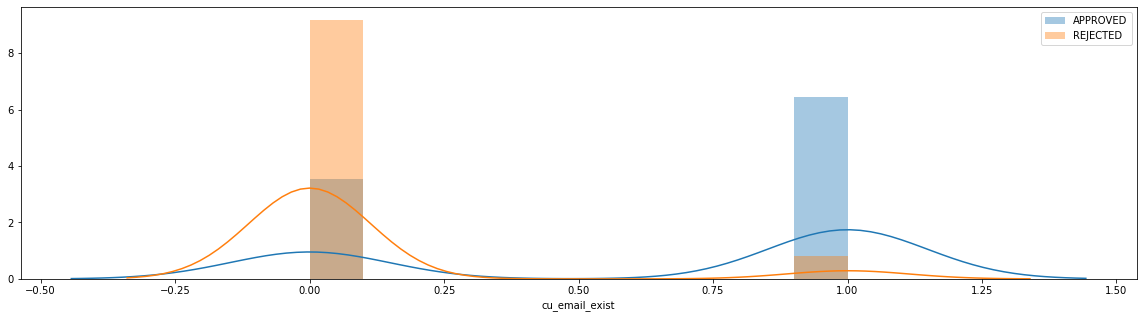

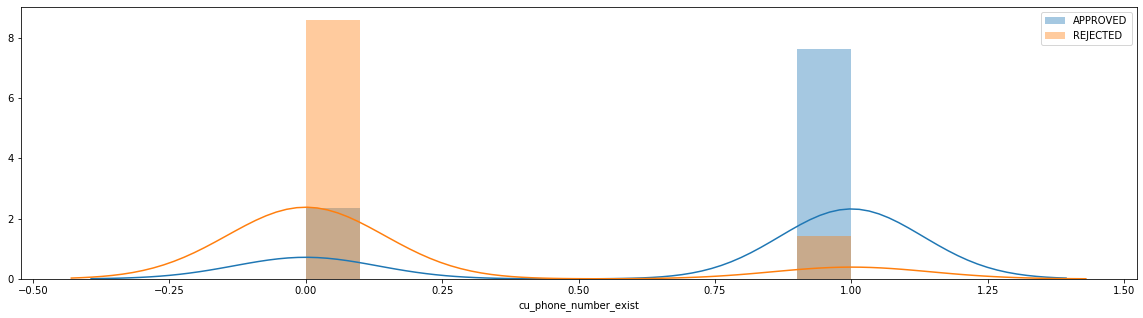

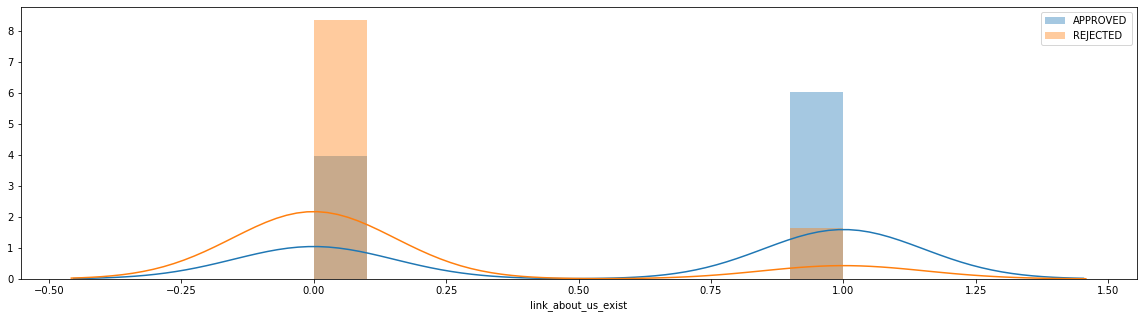

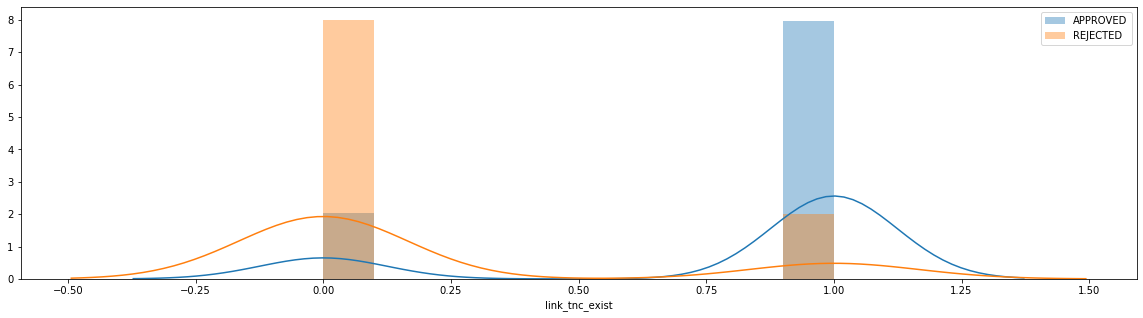

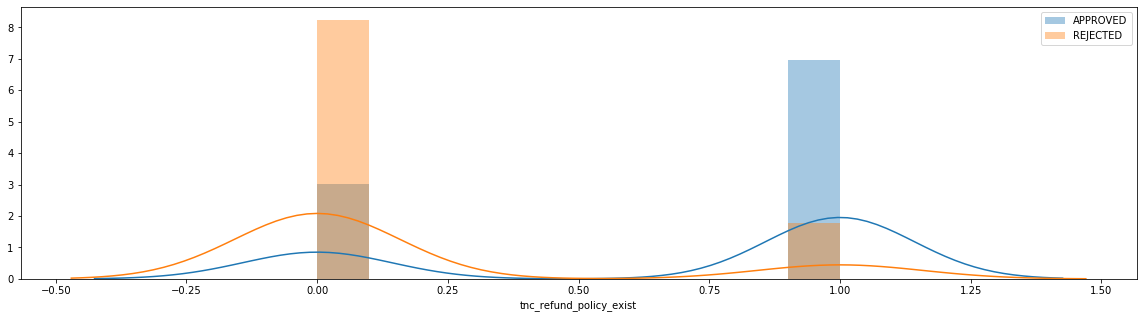

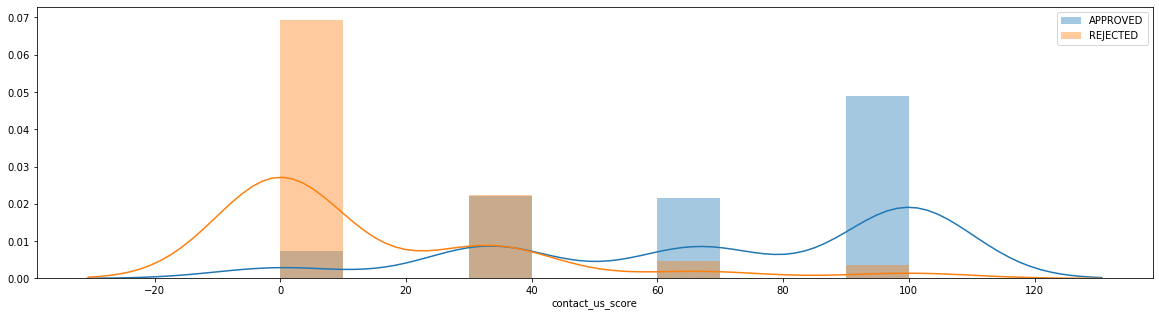

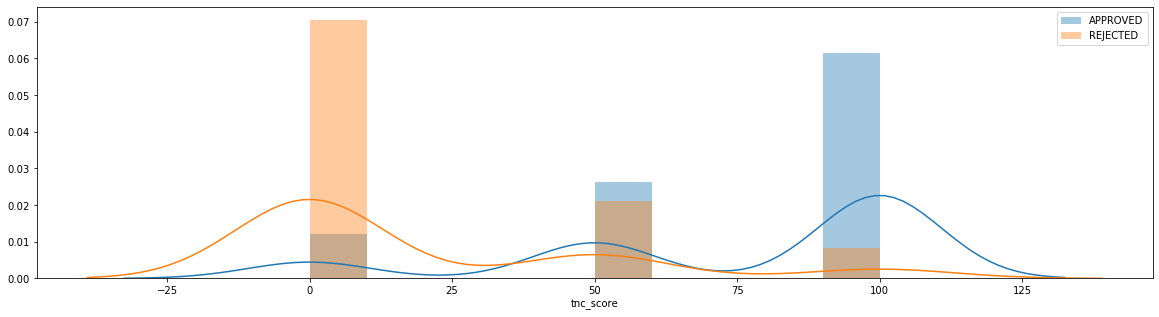

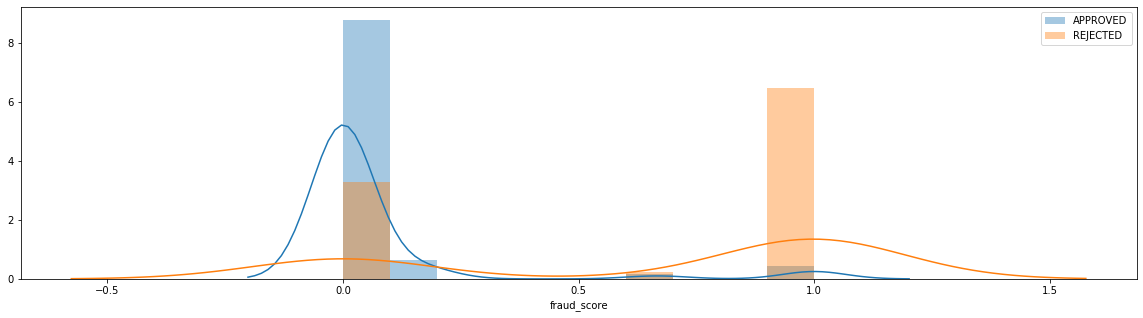

In [12]:
for column in join_df_cleaned:
    if not (column == 'merchant_name' or column == 'label' \
            or column == 'website' or column == 'links_response'):
        plt.figure(figsize=(20,5))
        sns.distplot(join_df_cleaned[join_df_cleaned.label == 'APPROVED'][column], bins=10, label = 'APPROVED')
        sns.distplot(join_df_cleaned[join_df_cleaned.label == 'REJECTED'][column], bins=10, label = 'REJECTED')
        plt.legend()
        plt.show()

In [13]:
join_df_cleaned.groupby("label").size()

label
APPROVED    356
REJECTED     85
dtype: int64

In [14]:
### Export For Modelling
join_df_cleaned[join_df_cleaned.label.isin(['APPROVED', 'REJECTED'])].to_csv("df_cleaned.csv")
join_df[join_df.label.isin(['APPROVED', 'REJECTED'])].to_csv("df_raw.csv")